# Agglomerative Clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('df_processed.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Month,DayofWeek,Is_Weekend,Season,PM2.5_to_PM10_Ratio
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,Moderate,1,3,0,Winter,0.50763
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,Moderate,1,4,0,Winter,0.50763
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,Moderate,1,5,1,Winter,0.50763
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,Moderate,1,6,1,Winter,0.50763
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,Moderate,1,0,0,Winter,0.50763


In [3]:
# Select the features for clustering
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
X = df[features]
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89


In [4]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

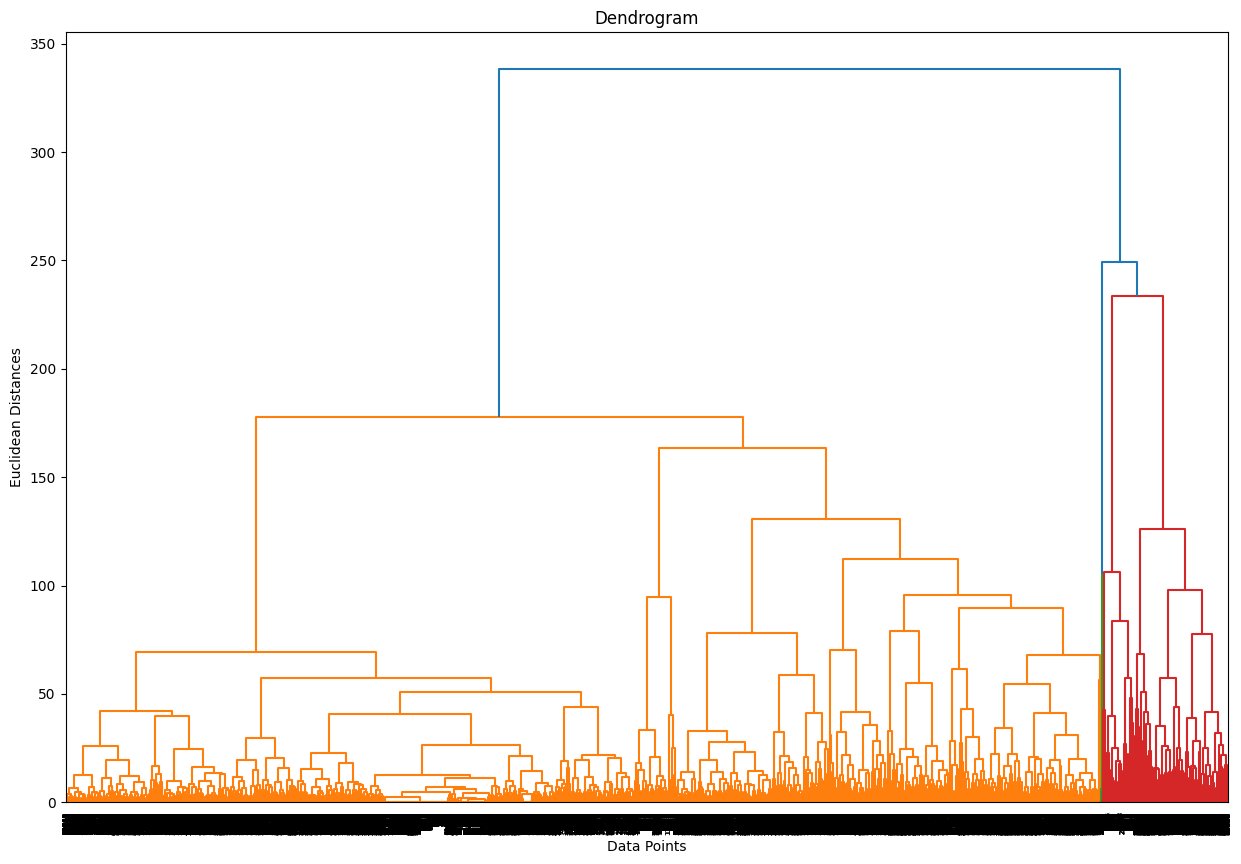

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

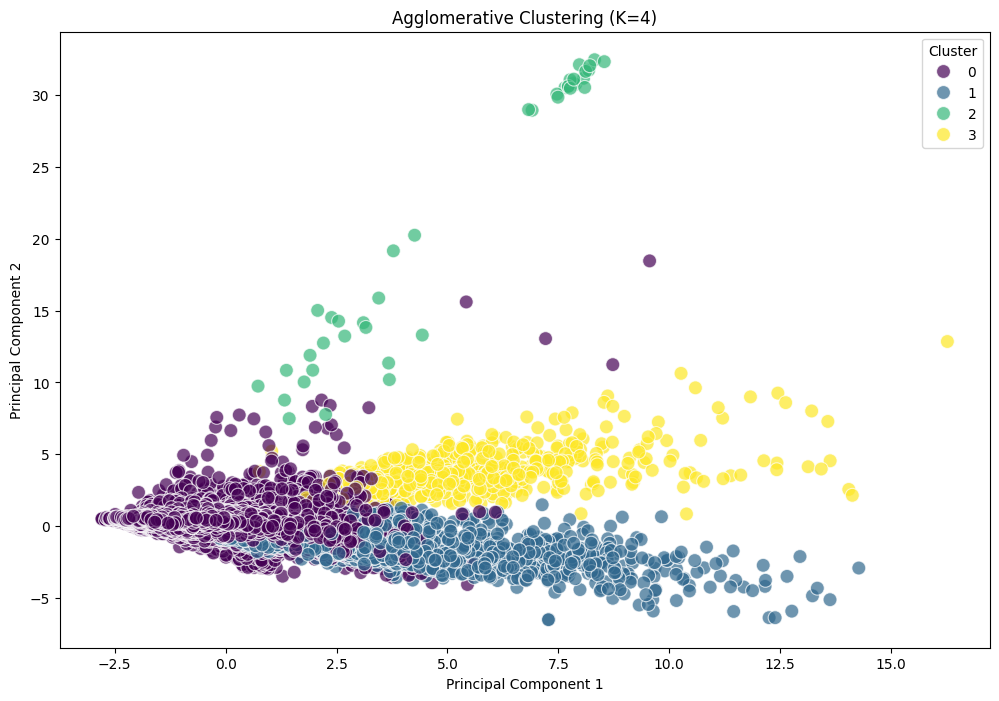

In [7]:
# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_cluster.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_labels, palette='viridis', s=100, alpha=0.7)
plt.title('Agglomerative Clustering (K=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [9]:
# Add the cluster labels to your original dataframe
df['agglomerative_cluster'] = agg_labels

# Display the dataframe with the new cluster column
print(df.head())

        City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad  2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad  2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad  2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad  2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2  ...  Benzene  Toluene    AQI  AQI_Bucket Month  DayofWeek  \
0  27.64  ...     0.00     0.02  118.0    Moderate     1          3   
1  24.55  ...     3.68     5.50  118.0    Moderate     1          4   
2  29.07  ...     6.80    16.40  118.0    Moderate     1          5   
3  18.59  ...     4.43    10.14  118.0    Moderate     1          6   
4  39.33  ...     7.01    18.89  118.0    Moderate     1          0   

   Is_Weekend  Season PM2.5_to_PM10_Ratio  agglomerative_cluster  
0           0  Winter             0.50763  

In [10]:
# Calculate the mean pollutant values for each cluster
agglomerative_cluster_centers = df.groupby('agglomerative_cluster')[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']].mean()
print(agglomerative_cluster_centers)

                            PM2.5        PM10         NO        NO2  \
agglomerative_cluster                                                 
0                       55.511709   95.767062  12.267144  23.227830   
1                      162.657594  268.316122  60.368340  58.394433   
2                       50.080000   63.138537   4.378049   6.894878   
3                       73.268108  104.313677  32.369964  84.415377   

                             NOx        NH3         CO        SO2         O3  \
agglomerative_cluster                                                          
0                      25.241103  19.872093   1.213665  11.586400  33.091384   
1                      84.876493  33.281024   1.961433  18.284855  40.564693   
2                       6.763171  13.166098   2.685854   6.851951  38.837805   
3                      64.660826  15.864443  32.294060  72.395006  43.756862   

                          Benzene     Toluene  
agglomerative_cluster                       

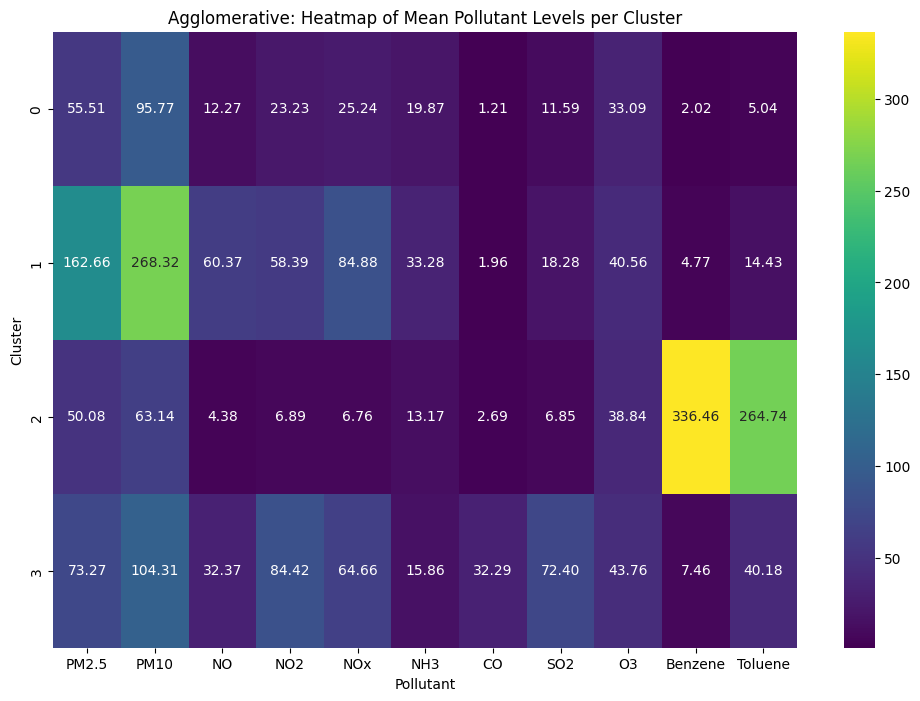

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(agglomerative_cluster_centers, annot=True, cmap='viridis', fmt='.2f')
plt.title('Agglomerative: Heatmap of Mean Pollutant Levels per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Pollutant')
plt.show()

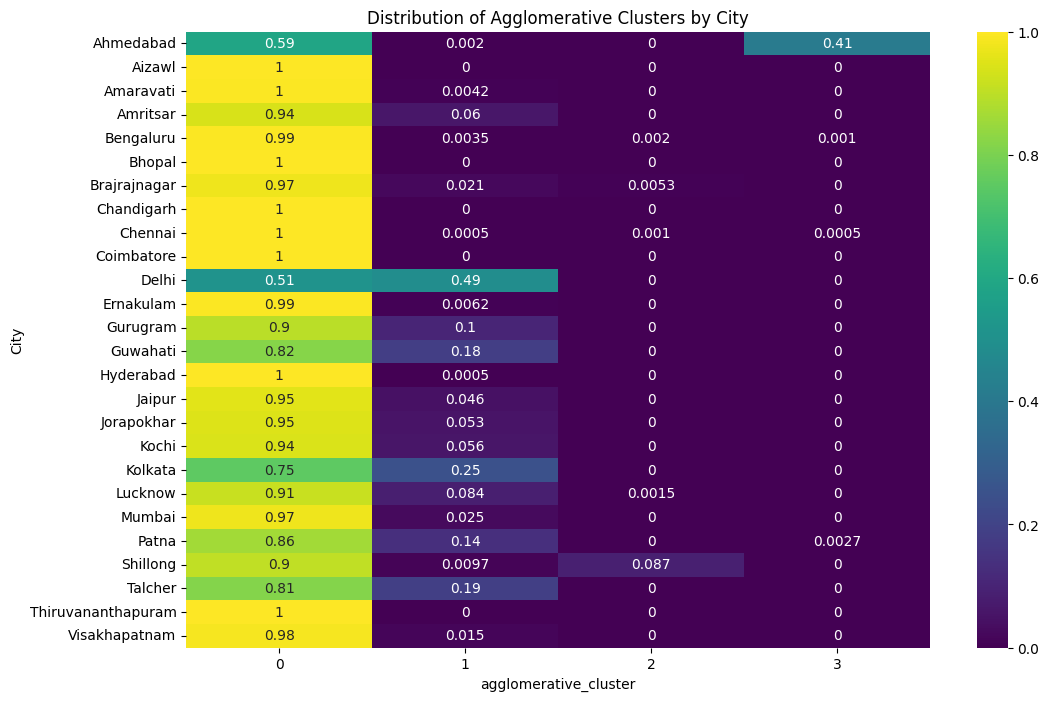

In [11]:
# See which cities are most frequently in each cluster
city_cluster_distribution_agg = df.groupby('City')['agglomerative_cluster'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(city_cluster_distribution_agg, annot=True, cmap='viridis')
plt.title('Distribution of Agglomerative Clusters by City')
plt.show()